# MNS - Biological Plausible Deep Learning

In [ ]:
!pip install -r requirements.txt --quiet

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
# Import Packages
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Import Network Architectures
from DNN import DNN, train_dnn_model, get_test_error, eval_dnn
from CNN import CNN, train_cnn_model

# Import log-helper/learning plot functions
from helpers import *
from logger import get_latest_log_fname, process_logger

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print("Torch Device: {}".format(torch.cuda.get_device_name(0)))
else:
    print("Torch Device: Local CPU")
    
# Remove files in log dir
log_dir = os.getcwd() + "/logs"
if not os.path.exists(log_dir):
    os.makedirs(directory)
    print("Created New Log Directory")
else:
    filelist = [ f for f in os.listdir(log_dir) if f.endswith(".bak") ]
    for f in filelist:
        os.remove(os.path.join(mydir, f))
    print("Deleted Old Files in Existing Log Directory")

Torch Device: Local CPU
Deleted Old Files in Existing Log Directory


# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                             train=True, 
                                             transform=transforms.ToTensor(),  
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                            train=False, 
                                            transform=transforms.ToTensor())

# Simple Feedforward Neural Net

In [4]:
# MNIST dataset
X, y = get_data(num_samples=70000)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=0)

# Define batchsize for data-loading/Epochs for training
batch_size = 100
num_epochs = 5
learning_rate = 0.001

# Instantiate the model with layersize and Logging directory
dnn_model = DNN(h_sizes=[784, 500], out_size=10)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate)

/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
model = train_dnn_model(dnn_model, num_epochs,
                        X, y, batch_size,
                        device, optimizer, criterion,
                        model_fname ="models/temp_model_dnn.ckpt",
                        verbose=True, logging=True)

# Get test error
score = get_test_error(device, model, X_test, y_test)
print("Test Accuracy: {}".format(score))

train | epoch  1 | acc: 0.9982 | loss: 0.0083 | time: 3.79
valid | epoch  1 | acc: 0.9753 | loss: 0.1024 | time: 0.23
--------------------------------------------------
train | epoch  2 | acc: 0.9972 | loss: 0.0099 | time: 3.97
valid | epoch  2 | acc: 0.9766 | loss: 0.0955 | time: 0.29
--------------------------------------------------
train | epoch  3 | acc: 0.9978 | loss: 0.0076 | time: 3.99
valid | epoch  3 | acc: 0.9772 | loss: 0.0899 | time: 0.33
--------------------------------------------------
train | epoch  4 | acc: 0.9985 | loss: 0.0059 | time: 4.00
valid | epoch  4 | acc: 0.9764 | loss: 0.1001 | time: 0.24
--------------------------------------------------
train | epoch  5 | acc: 0.9985 | loss: 0.0055 | time: 4.09
valid | epoch  5 | acc: 0.9759 | loss: 0.1048 | time: 0.26
--------------------------------------------------


DNN.py:176: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).to(device)


0.9908

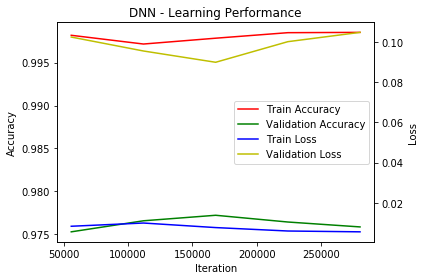

In [10]:
log_fname = get_latest_log_fname(log_dir)
its, train_loss, val_loss, train_acc, val_acc = process_logger(log_fname)
plot_learning(its, train_acc, val_acc, train_loss, val_loss, "DNN - Learning Performance")

In [13]:
eval_dnn(batch_size=100, h_sizes=[784, 500], learning_rate=0.001,
         k_fold=5, verbose=True)

/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


0.9731505284204514
0.9730752749607199
0.9740732804799657
0.9747088661856113
0.9660617319234067


0.972213936394031

# Simple Convolutional Neural Network

In [ ]:
# ConvNet Parameters
ch_sizes = [1, 16, 32]
k_sizes = [5, 5]
stride = 1
padding = 2
out_size = 10
num_epochs = 5
learning_rate = 0.001

# Instantiate the model with layersizes, Loss fct, optimizer
cnn_model = CNN(ch_sizes, k_sizes,
                stride, padding, out_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)

In [ ]:
train_cnn_model(cnn_model, num_epochs,
                train_loader, test_loader,
                device, optimizer, criterion,
                model_fname ="models/temp_model_cnn.ckpt",
                verbose=True, logging=True)

## Guergiev et al (2017)